In [1]:
import pandas as pd
#import geopandas
import matplotlib.pyplot as plt

In [ ]:
info_brazil = pd.read_excel('data/RELATORIO_DTB_BRASIL_MUNICIPIO.xls')

In [3]:
info_brazil

UF           Nome_UF  Mesorregião Geográfica   Nome_Mesorregião  \
0     11          Rondônia                       2  Leste Rondoniense   
1     11          Rondônia                       2  Leste Rondoniense   
2     11          Rondônia                       2  Leste Rondoniense   
3     11          Rondônia                       2  Leste Rondoniense   
4     11          Rondônia                       2  Leste Rondoniense   
...   ..               ...                     ...                ...   
5565  52             Goiás                       5         Sul Goiano   
5566  52             Goiás                       5         Sul Goiano   
5567  52             Goiás                       4       Leste Goiano   
5568  52             Goiás                       4       Leste Goiano   
5569  53  Distrito Federal                       1   Distrito Federal   

      Microrregião Geográfica    Nome_Microrregião  Município  \
0                           6               Cacoal         15   
1                           6               Cacoal        379   
2                           3            Ariquemes        403   
3                           5     Alvorada D'Oeste        346   
4                           3            Ariquemes         23   
...                       ...                  ...        ...   
5565                       16         Pires do Rio      22005   
5566                       15           Meia Ponte      22054   
5567                       12  Entorno de Brasília      22203   
5568                       12  Entorno de Brasília      22302   
5569                        1             Brasília        108   

      Código Município Completo           Nome_Município  
0                       1100015    Alta Floresta D'Oeste  
1                       1100379  Alto Alegre dos Parecis  
2                       1100403             Alto Paraíso  
3                       1100346         Alvorada D'Oeste  
4                       1100023                Ariquemes  
...                         ...                      ...  
5565                    5222005               Vianópolis  
5566                    5222054           Vicentinópolis  
5567                    5222203                 Vila Boa  
5568                    5222302            Vila Propício  
5569                    5300108                 Brasília  

[5570 rows x 9 columns]

In [3]:
import geopandas

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [6]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [7]:
print(gdf.head())

           City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91000 -15.78000)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66000 -33.45000)
3        Bogota   Colombia      4.60     -74.08    POINT (-74.08000 4.60000)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86000 10.48000)


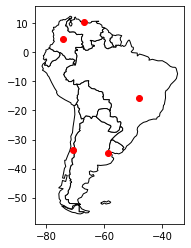

In [9]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [14]:
shapefile="data/BRMUE250GC_SIR.shp"
municipios=geopandas.read_file(shapefile)

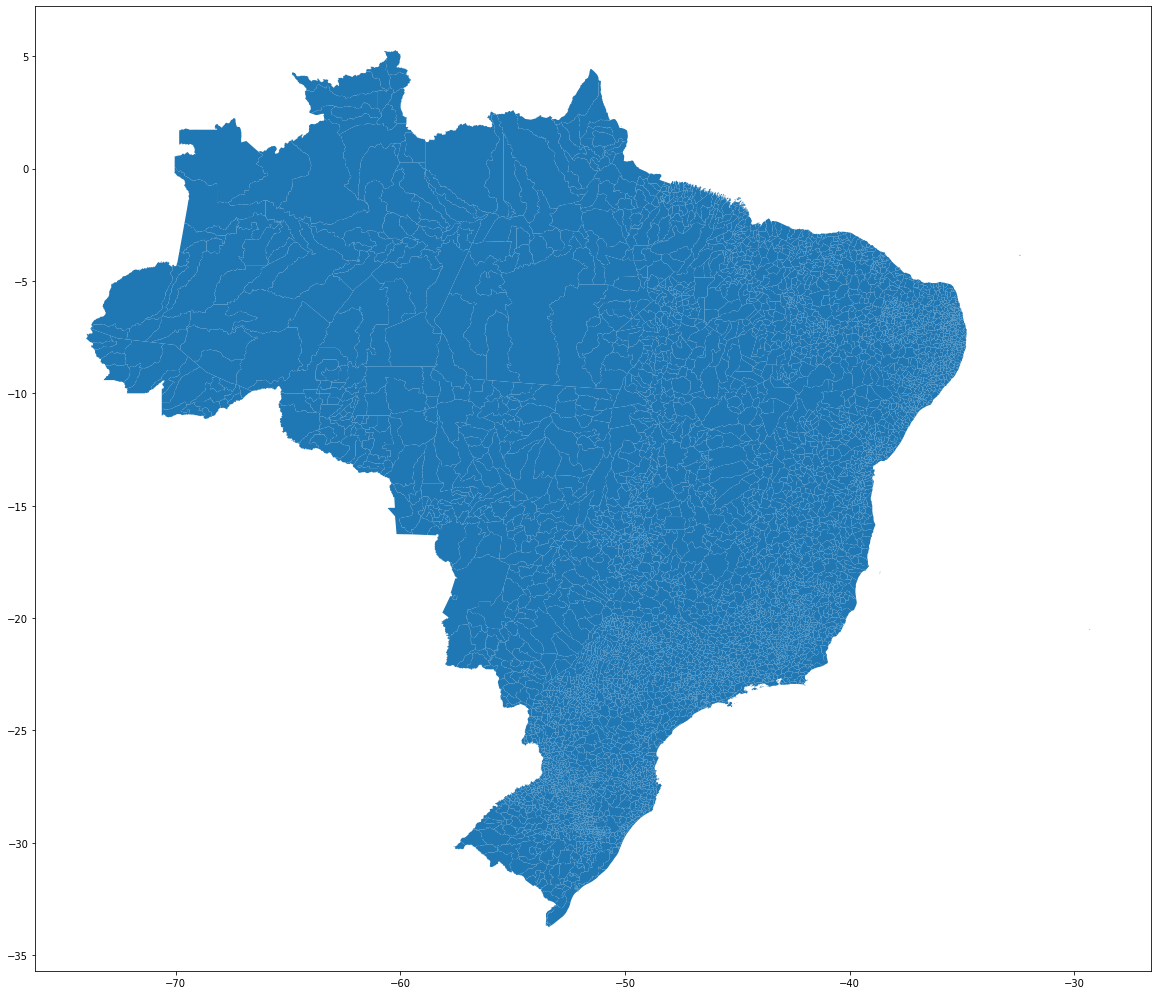

In [19]:

municipios.plot(figsize=(20,20))


In [27]:
municipios

NM_MUNICIP CD_GEOCMU  \
0                         CAIUÃ   3509106   
1                       CASTILHO   3511003   
2                        DRACENA   3514403   
3               ESTRELA DO NORTE   3515301   
4     EUCLIDES DA CUNHA PAULISTA   3515350   
...                          ...       ...   
5567              TEIXEIRÃPOLIS   1101559   
5568                   THEOBROMA   1101609   
5569                      URUPÃ   1101708   
5570               VALE DO ANARI   1101757   
5571            VALE DO PARAÃSO   1101807   

                                               geometry  
0     POLYGON ((-51.86001 -21.58072, -51.85892 -21.5...  
1     POLYGON ((-51.41936 -20.68108, -51.41942 -20.6...  
2     POLYGON ((-51.48515 -21.42765, -51.48500 -21.4...  
3     POLYGON ((-51.57097 -22.39887, -51.57099 -22.3...  
4     POLYGON ((-52.44569 -22.60828, -52.44569 -22.6...  
...                                                 ...  
5567  POLYGON ((-62.12258 -10.89939, -62.12418 -10.9...  
5568  POLYGON ((-61.95442 -9.94968, -61.95552 -9.950...  
5569  POLYGON ((-62.15601 -11.02598, -62.15500 -11.0...  
5570  POLYGON ((-61.57464 -9.71779, -61.58190 -9.711...  
5571  POLYGON ((-61.97267 -10.06753, -61.97104 -10.0...  

[5572 rows x 3 columns]

In [21]:
data_cities = pd.read_csv("data/growth_cities_BR_class_.csv", delimiter=';')

In [29]:
data_cities[data_cities.city_ibge_code==3511003]

Unnamed: 0        date state      city place_type  confirmed  deaths  \
3334        3334  2020-06-08    SP  Castilho       city          6       1   

      is_last  estimated_population_2019  city_ibge_code  ...  \
3334     True                    21006.0         3511003  ...   

      growth_accel_rate  growth_rate_NORM_(%)  growth_accel_NORM_(%)  \
3334           0.000157              1.741875               0.024354   

      growth_accel_rate_NORM_(%)  LENTO  EXPONENCIAL  DESACELERACAO  ESTAVEL  \
3334                    0.002613      1            1              0        0   

      LINEAR  CLASSIFICACAO  
3334       0          LENTO  

[1 rows x 24 columns]

In [30]:
municipios.rename(columns={'CD_GEOCMU':'city_ibge_code'}, inplace=True)

In [31]:
municipios

NM_MUNICIP city_ibge_code  \
0                         CAIUÃ        3509106   
1                       CASTILHO        3511003   
2                        DRACENA        3514403   
3               ESTRELA DO NORTE        3515301   
4     EUCLIDES DA CUNHA PAULISTA        3515350   
...                          ...            ...   
5567              TEIXEIRÃPOLIS        1101559   
5568                   THEOBROMA        1101609   
5569                      URUPÃ        1101708   
5570               VALE DO ANARI        1101757   
5571            VALE DO PARAÃSO        1101807   

                                               geometry  
0     POLYGON ((-51.86001 -21.58072, -51.85892 -21.5...  
1     POLYGON ((-51.41936 -20.68108, -51.41942 -20.6...  
2     POLYGON ((-51.48515 -21.42765, -51.48500 -21.4...  
3     POLYGON ((-51.57097 -22.39887, -51.57099 -22.3...  
4     POLYGON ((-52.44569 -22.60828, -52.44569 -22.6...  
...                                                 ...  
5567  POLYGON ((-62.12258 -10.89939, -62.12418 -10.9...  
5568  POLYGON ((-61.95442 -9.94968, -61.95552 -9.950...  
5569  POLYGON ((-62.15601 -11.02598, -62.15500 -11.0...  
5570  POLYGON ((-61.57464 -9.71779, -61.58190 -9.711...  
5571  POLYGON ((-61.97267 -10.06753, -61.97104 -10.0...  

[5572 rows x 3 columns]

In [34]:
data_cities.dtypes

Unnamed: 0                          int64
date                               object
state                              object
city                               object
place_type                         object
confirmed                           int64
deaths                              int64
is_last                              bool
estimated_population_2019         float64
city_ibge_code                      int64
confirmed_per_100k_inhabitants    float64
death_rate                        float64
growth_rate                       float64
growth_accel                      float64
growth_accel_rate                 float64
growth_rate_NORM_(%)              float64
growth_accel_NORM_(%)             float64
growth_accel_rate_NORM_(%)        float64
LENTO                               int64
EXPONENCIAL                         int64
DESACELERACAO                       int64
ESTAVEL                             int64
LINEAR                              int64
CLASSIFICACAO                     

In [35]:
municipios.dtypes

NM_MUNICIP          object
city_ibge_code      object
geometry          geometry
dtype: object

In [36]:
municipios["city_ibge_code"] = municipios["city_ibge_code"].apply(pd.to_numeric)

In [37]:
municipios.dtypes

NM_MUNICIP          object
city_ibge_code       int64
geometry          geometry
dtype: object

In [46]:
data_cidades=data_cities.merge(municipios, on='city_ibge_code')

In [57]:
data_cidades.drop(data_cidades.columns[0], axis=1, inplace=True)

In [51]:
data_cidades=data_cidades.drop('NM_MUNICIP',axis=1)

In [61]:
data_cidades = geopandas.GeoDataFrame(data_cidades)

In [77]:
def cores(s):
    if s=="LENTO":
        return '#E1A28A'
    if s=="LINEAR":
        return '#ED6C46'
    if s=="EXPONENCIAL":
        return 'r'
    if s=="DESACELERACAO":
        return 'y'
    if s=="ESTAVEL":
        return 'g'

In [78]:
data_cidades["color"]=data_cidades["CLASSIFICACAO"].apply(cores)

In [79]:
data_cidades

state                       city place_type  confirmed  deaths  is_last  \
0       AC                 Acrelândia       city        166       2     True   
1       AC               Assis Brasil       city         60       4     True   
2       AC                  Brasiléia       city        128       5     True   
3       AC                     Bujari       city         77       1     True   
4       AC                   Capixaba       city         65       1     True   
...    ...                        ...        ...        ...     ...      ...   
4505    MA  São Francisco do Maranhão       city          1       0    False   
4506    MG                 Manhumirim       city          1       0    False   
4507    SC     São Pedro de Alcântara       city          1       0    False   
4508    BA                    Itamari       city          1       0    False   
4509    SC         Santa Rosa de Lima       city          2       0    False   

      estimated_population_2019  city_ibge_code  \
0                       15256.0         1200013   
1                        7417.0         1200054   
2                       26278.0         1200104   
3                       10266.0         1200138   
4                       11733.0         1200179   
...                         ...             ...   
4505                    12210.0         2110906   
4506                    22707.0         3139508   
4507                     5823.0         4217253   
4508                     8035.0         2915700   
4509                     2142.0         4215604   

      confirmed_per_100k_inhabitants  death_rate  ...  growth_accel_NORM_(%)  \
0                         1088.09649      0.0120  ...              -0.012444   
1                          808.95241      0.0667  ...               0.171587   
2                          487.09947      0.0391  ...               0.293109   
3                          750.04870      0.0130  ...               0.106011   
4                          553.99301      0.0154  ...               0.112810   
...                              ...         ...  ...                    ...   
4505                         8.19001      0.0000  ...               0.000000   
4506                         4.40393      0.0000  ...               0.000000   
4507                        17.17328      0.0000  ...               0.000000   
4508                        12.44555      0.0000  ...               0.000000   
4509                        93.37068      0.0000  ...               0.170445   

      growth_accel_rate_NORM_(%)  LENTO  EXPONENCIAL  DESACELERACAO  ESTAVEL  \
0                      -0.007379      0            0              1        0   
1                      -0.000028      0            1              0        0   
2                       0.025704      0            1              0        0   
3                       0.003239      0            1              0        0   
4                      -0.004456      0            1              0        0   
...                          ...    ...          ...            ...      ...   
4505                    0.000000      1            0              0        1   
4506                    0.000000      1            0              0        1   
4507                    0.000000      1            0              0        1   
4508                    0.000000      1            0              0        1   
4509                   -0.228074      1            1              0        0   

      LINEAR  CLASSIFICACAO  \
0          0  DESACELERACAO   
1          0    EXPONENCIAL   
2          0    EXPONENCIAL   
3          0    EXPONENCIAL   
4          0    EXPONENCIAL   
...      ...            ...   
4505       0          LENTO   
4506       0          LENTO   
4507       0          LENTO   
4508       0          LENTO   
4509       0          LENTO   

                                               geometry    color  
0     POLYGON ((-66.81025 -9.81805, -66.73564 -9.850...        y  
1 

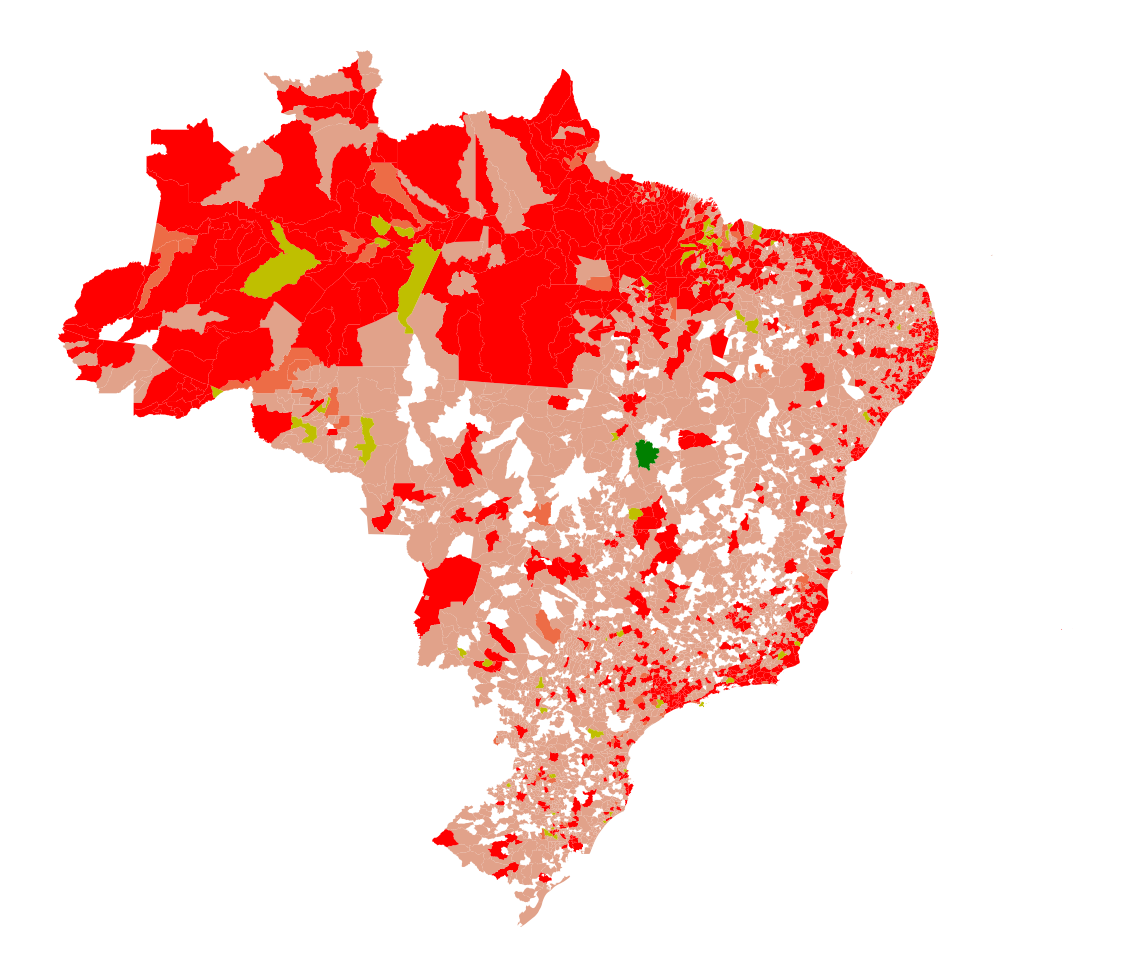

In [89]:
plot=data_cidades.plot(color=data_cidades["color"],categorical=True,legend=True,figsize=(20,20))

plot.set_axis_off()
fig = plot.get_figure()

fig.savefig("acelera_map.png")

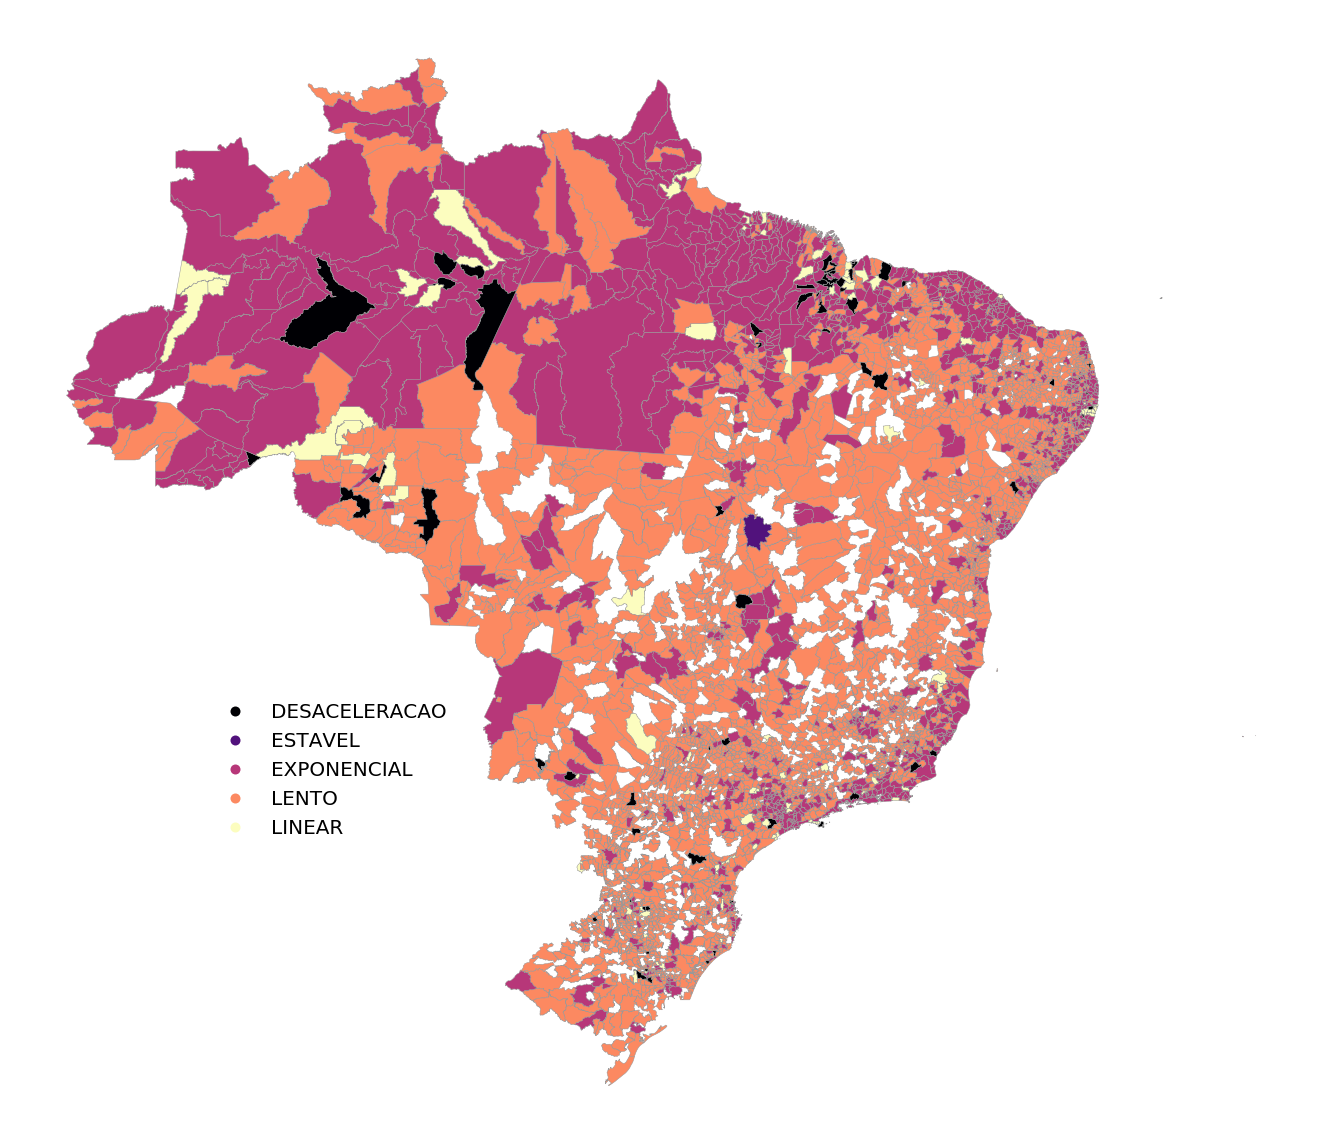

In [118]:
fig, ax = plt.subplots(1, figsize=(28,16))
data_cidades.plot(column='CLASSIFICACAO', categorical=True, cmap='magma', linewidth=.5, edgecolor='0.6',
         legend=True, legend_kwds={'bbox_to_anchor':(.35, 0.4),'fontsize':20,'frameon':False}, ax=ax)
ax.axis('off')
#ax.set_title('Acelerômetro',fontsize=28)
plt.tight_layout()
plt.savefig('acelerometro_BR.png',dpi=300)

In [116]:
data_cidades_SP=data_cidades[data_cidades["state"]=="SP"]

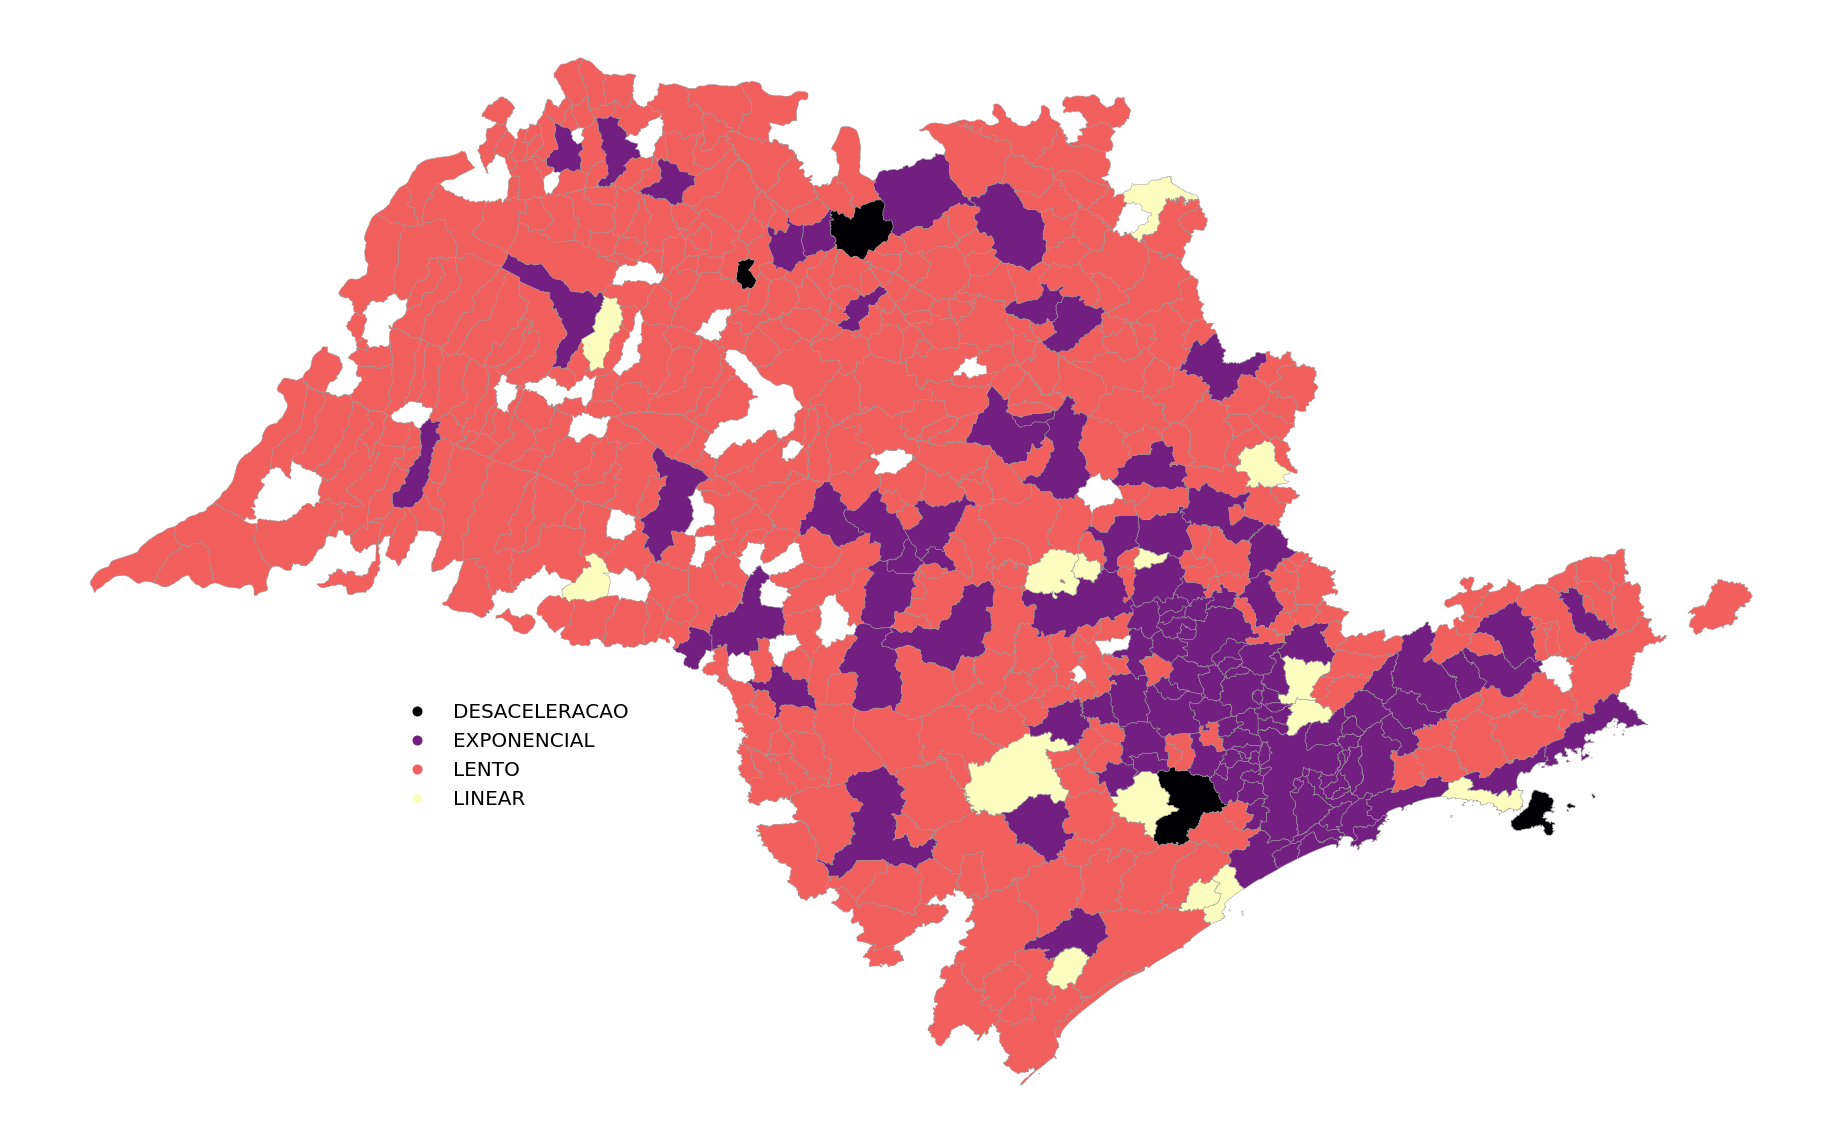

In [122]:
fig, ax = plt.subplots(1, figsize=(28,16))
data_cidades_SP.plot(column='CLASSIFICACAO', categorical=True, cmap='magma', linewidth=.5, edgecolor='0.6',
         legend=True, legend_kwds={'bbox_to_anchor':(.35, 0.4),'fontsize':20,'frameon':False}, ax=ax)
ax.axis('off')
#ax.set_title('Acelerômetro',fontsize=28)
plt.tight_layout()
plt.savefig('acelerometro_SP.png',dpi=300)



In [125]:
data_cidades_SC=data_cidades[data_cidades["state"]=="SC"]

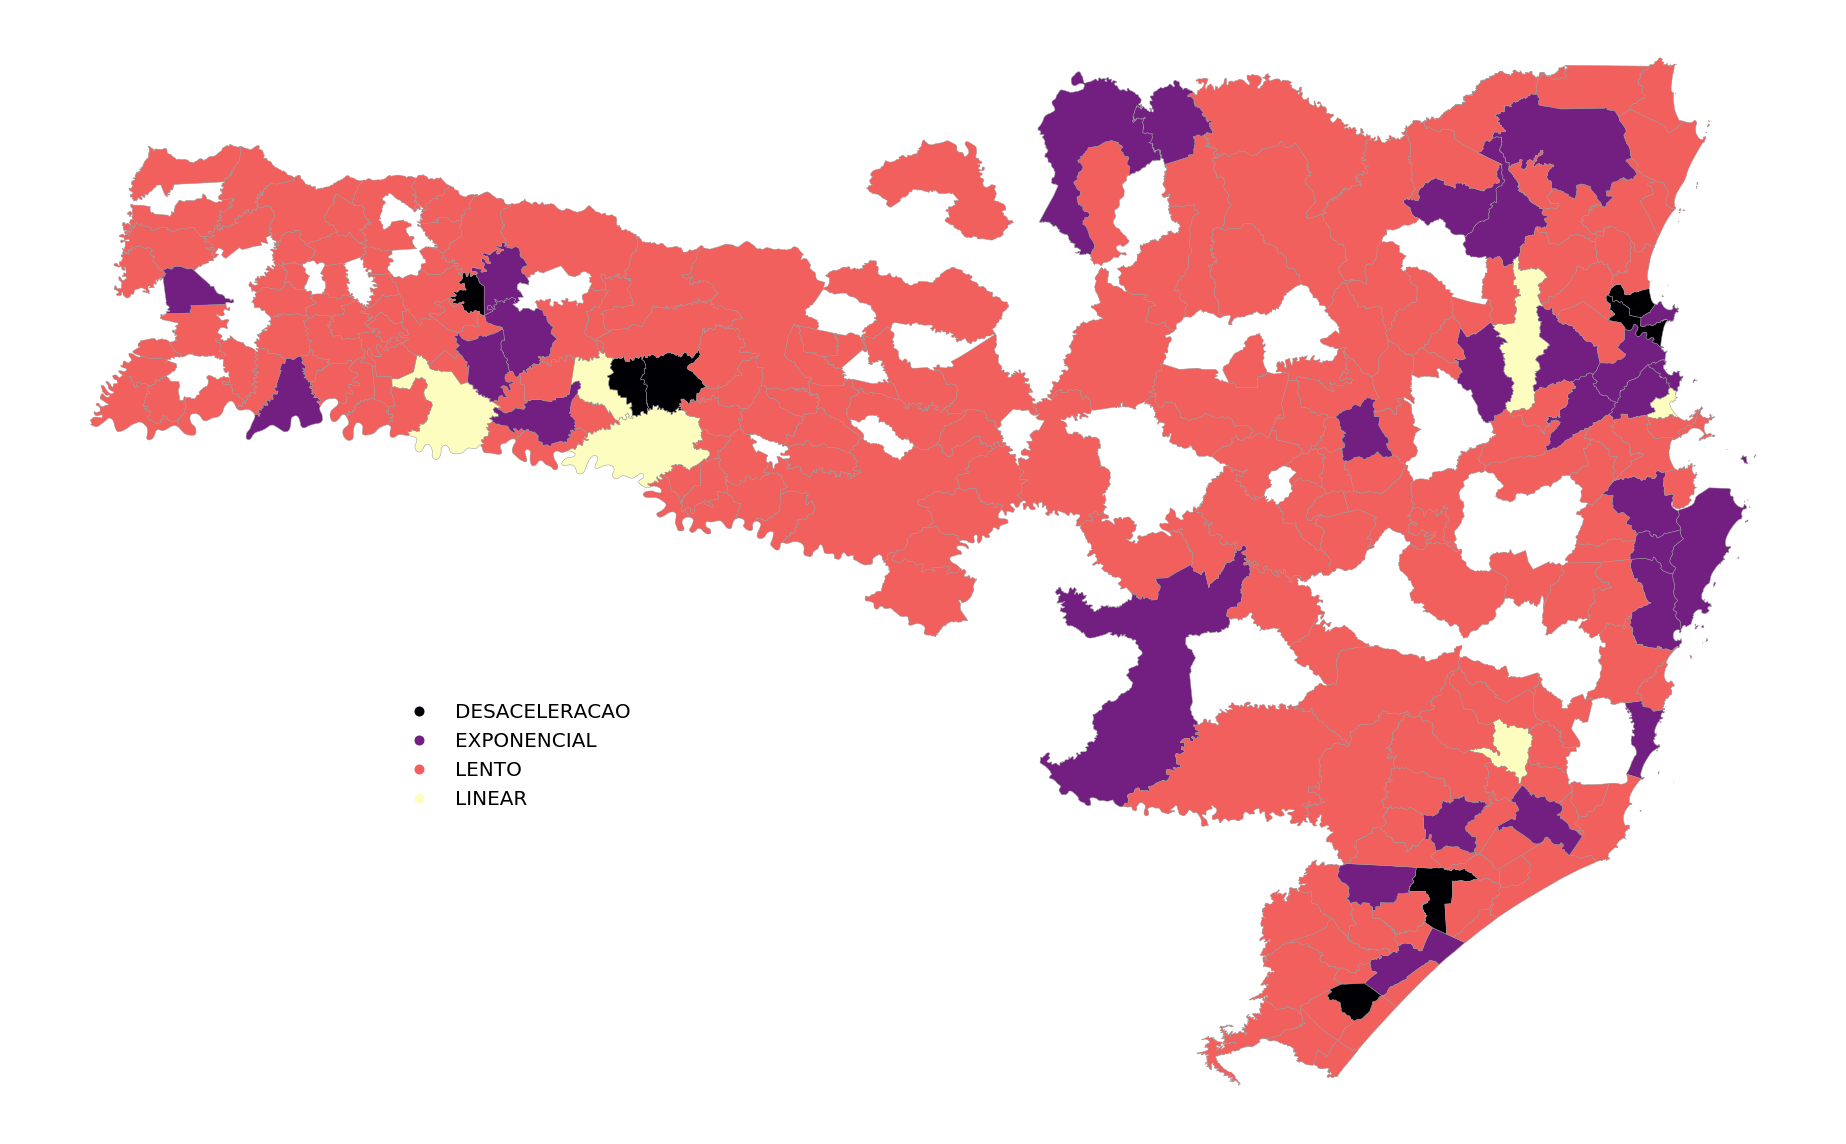

In [120]:
fig, ax = plt.subplots(1, figsize=(28,16))
data_cidades_SC.plot(column='CLASSIFICACAO', categorical=True, cmap='magma', linewidth=.5, edgecolor='0.6',
         legend=True, legend_kwds={'bbox_to_anchor':(.35, 0.4),'fontsize':20,'frameon':False}, ax=ax)
ax.axis('off')
#ax.set_title('Acelerômetro',fontsize=28)
plt.tight_layout()
plt.savefig('acelerometro_SC.png',dpi=300)

In [124]:
data_cidades_PR=data_cidades[data_cidades["state"]=="PR"]

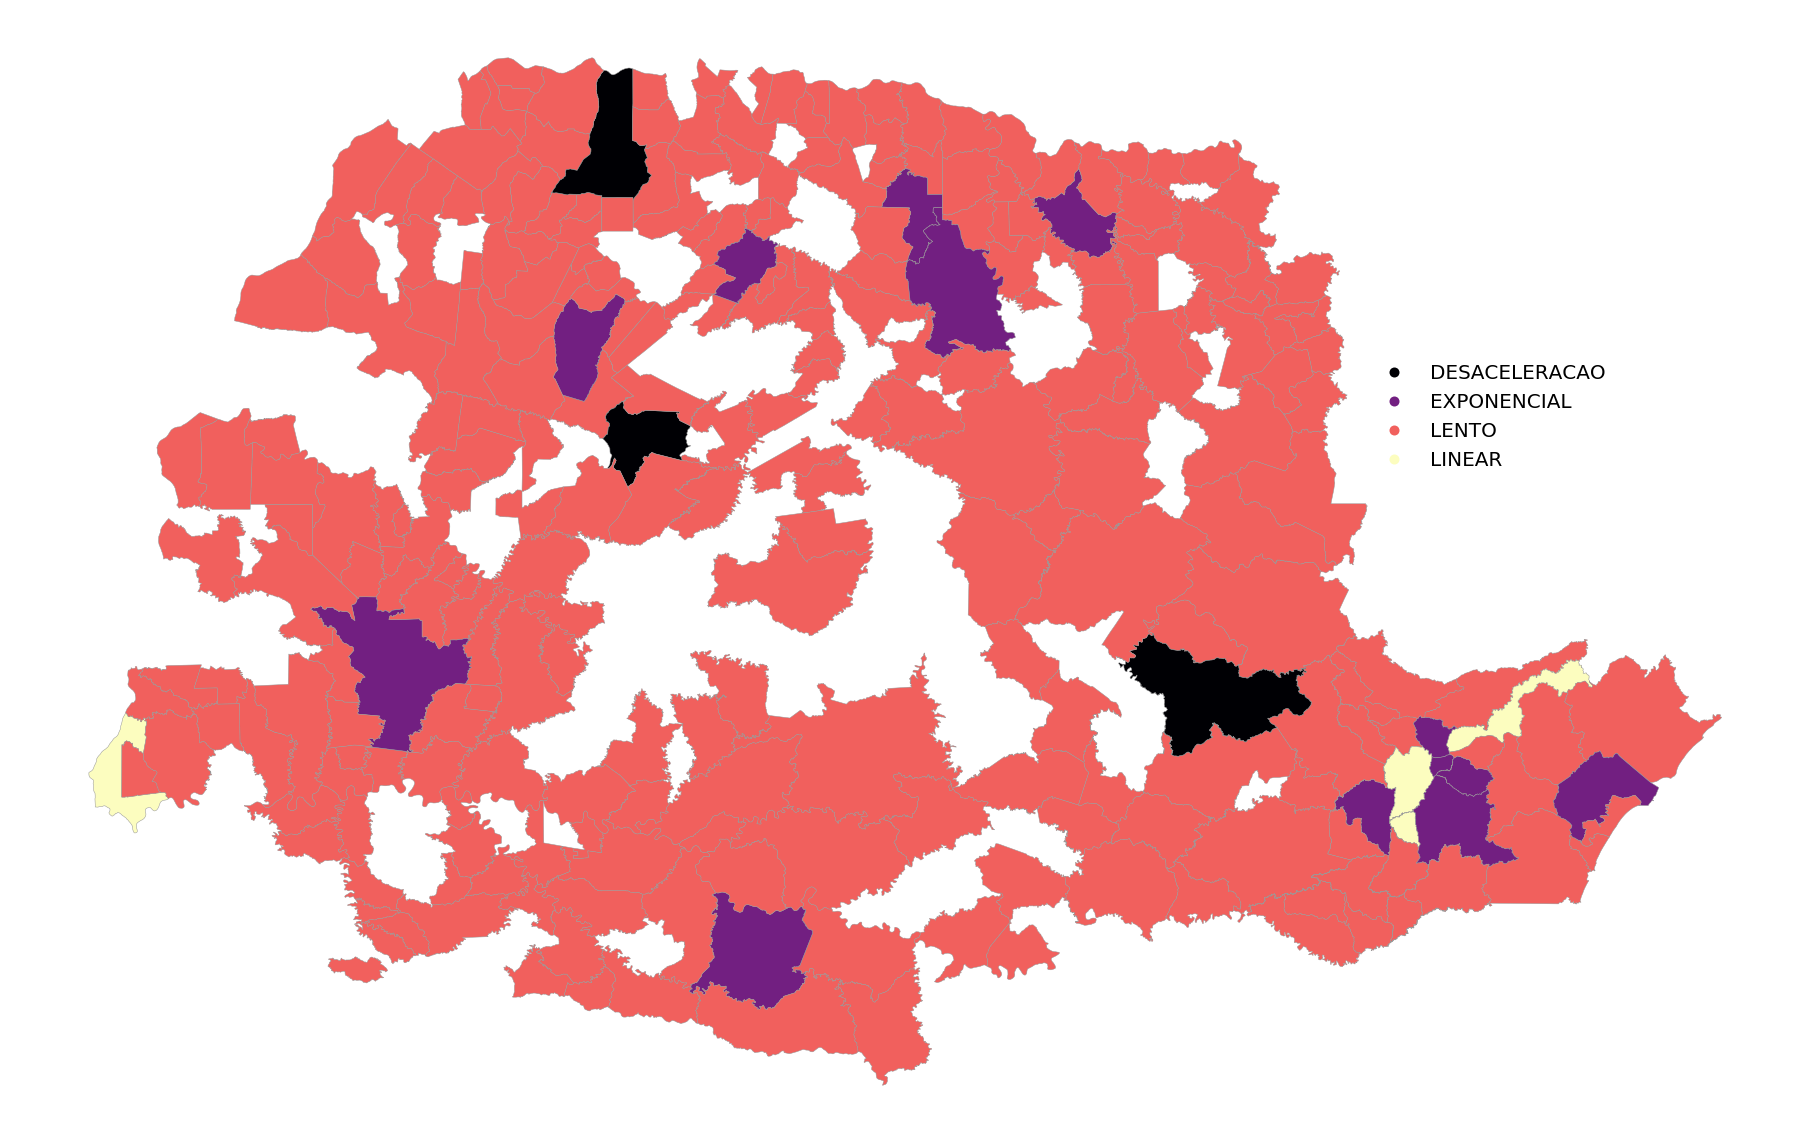

In [132]:
fig, ax = plt.subplots(1, figsize=(28,16))
data_cidades_PR.plot(column='CLASSIFICACAO', categorical=True, cmap='magma', linewidth=.5, edgecolor='0.6',
         legend=True, legend_kwds={'bbox_to_anchor':(.9, 0.7),'fontsize':20,'frameon':False}, ax=ax)
ax.axis('off')
#ax.set_title('Acelerômetro',fontsize=28)
plt.tight_layout()
plt.savefig('acelerometro_PR.png',dpi=300)

In [135]:
data_cidades_PE=data_cidades[data_cidades["state"]=="PE"]

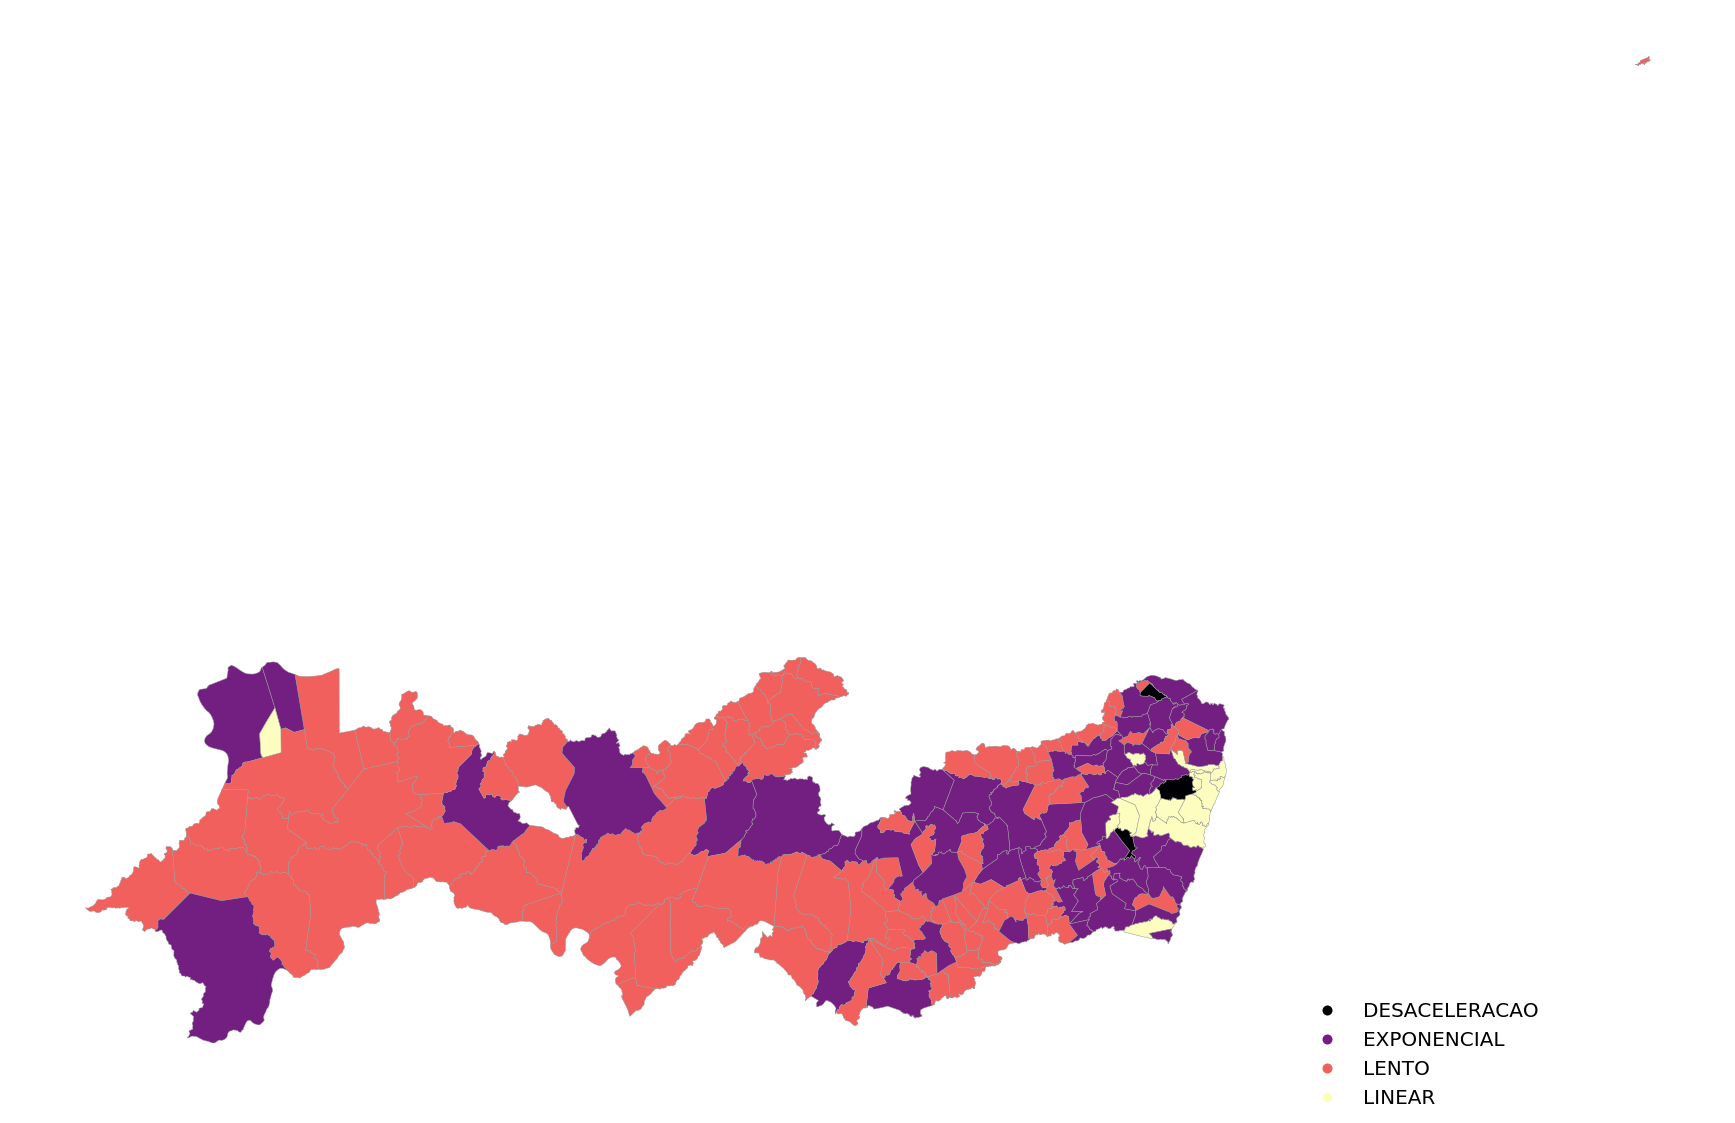

In [138]:
fig, ax = plt.subplots(1, figsize=(28,16))
data_cidades_PE.plot(column='CLASSIFICACAO', categorical=True, cmap='magma', linewidth=.5, edgecolor='0.6',
         legend=True, legend_kwds={'bbox_to_anchor':(.9, 0.1),'fontsize':20,'frameon':False}, ax=ax)
ax.axis('off')
#ax.set_title('Acelerômetro',fontsize=28)
plt.tight_layout()
plt.savefig('acelerometro_PE.png',dpi=300)

In [139]:
data_cidades_DF=data_cidades[data_cidades["state"]=="DF"]

In [140]:
data_cidades_DF

state      city place_type  confirmed  deaths  is_last  \
659    DF  Brasília       city      15015     196     True   

     estimated_population_2019  city_ibge_code  \
659                  3015268.0         5300108   

     confirmed_per_100k_inhabitants  death_rate  ...  growth_accel_NORM_(%)  \
659                       497.96569      0.0131  ...               0.086308   

     growth_accel_rate_NORM_(%)  LENTO  EXPONENCIAL  DESACELERACAO  ESTAVEL  \
659                    0.001538      0            1              0        0   

     LINEAR  CLASSIFICACAO                                           geometry  \
659       0    EXPONENCIAL  POLYGON ((-48.05328 -15.50026, -48.03611 -15.5...   

     color  
659      r  

[1 rows x 24 columns]